In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [17]:
samples = 1000
th = np.random.rand(samples)
r = np.random.rand(samples)
x = 1*r*np.cos(th*2*np.pi)
y = 3.5*r*np.sin(th*2*np.pi)
z = 0.02*np.random.randn(samples)
# Bases of rotated hyperplane
v1 = np.array([1,1,-0.5])
v2 = np.array([1,-1,0])
v1 = v1/norm(v1)
v2 = v2/norm(v2)
v3 = np.cross(v1,v2)
# Supposing tha x,y,z are the cordinates on bases v1,v2,v3
# I want to read them in canonical base
M = np.matrix(np.concatenate([v1.reshape(-1,1),v2.reshape(-1,1),v3.reshape(-1,1)],axis=1))
X = np.matrix(np.concatenate([x.reshape(-1,1),y.reshape(-1,1),z.reshape(-1,1)],axis=1))
Y = X@M.T
# Inertia
I2 = norm(Y@v2.reshape(-1,1))
I1 = norm(Y@v1.reshape(-1,1))
I3 = norm(Y@v3.reshape(-1,1))

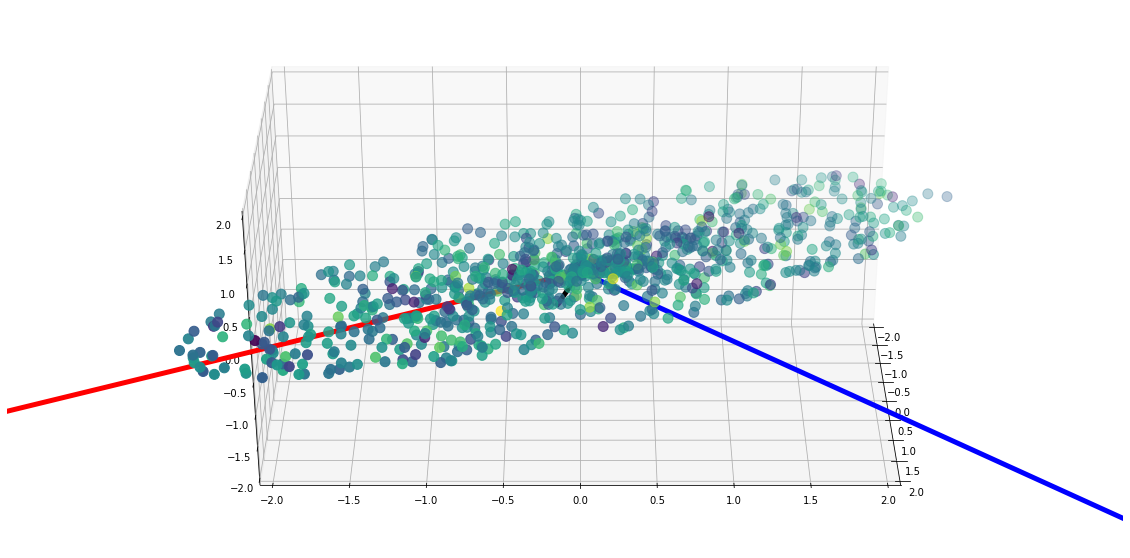

In [18]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d', azim=-0)
ax.scatter3D(Y[:,0], Y[:,1], Y[:,2], s=100, c=z, cmap='viridis')
ax.set_xlim3d(-2,2)
ax.set_ylim3d(-2,2)
ax.set_zlim3d(-2,2)
## Create line on first direction
t = np.linspace(0,1,samples)
ax.plot(t*v2[0]*I2, t*v2[1]*I2, t*v2[2]*I2,linewidth=5, color='r')
ax.plot(t*v1[0]*I1, t*v1[1]*I1, t*v1[2]*I1,linewidth=5, color='b')
ax.plot(t*v3[0]*I3, t*v3[1]*I3, t*v3[2]*I3,linewidth=5, color='k')

In [ ]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d', azim=-10)
ax.scatter3D(Y[:,0], Y[:,1], Y[:,2], s=100, c=z, cmap='viridis')
ax.set_xlim3d(-2,2)
ax.set_ylim3d(-2,2)
ax.set_zlim3d(-2,2)

In [10]:
print(f'mean: {Y.mean(0)}, std: {Y.std(0)}')

print(norm(Y@v2.reshape(-1,1))**2)
print(norm(Y@v1.reshape(-1,1))**2)
print(norm(Y@v3.reshape(-1,1))**2)

mean: [[ 0.02531477 -0.00999949 -0.0037267 ]], std: [[1.02414391 1.03330842 0.13811291]]
1965.6889463314533
170.38357399323837
0.35440554014445763


In [11]:
import plotly.express as px

df = pd.DataFrame(Y,columns=['X','Y','Z'])
fig = px.scatter_3d(df, x='X', y='Y', z='Z',
              color='Z',width=1920, height=1080)
fig.show()

In [6]:
dict(a=2,b=3)

{'a': 2, 'b': 3}